In [25]:
import numpy as np
import matplotlib.pyplot as plt

In [39]:
# Define basis functions and time
def basis_func(t):
    return np.array([1, t, t**2, t**3]) 
def basis_deri(t):
    return np.array([0, 1, 2*t, 3*t**2])


In [27]:
# Initial and final times
t_ini = 0
T = 10

In [28]:
# Initial and final conditions
x1_0 = 0
x1_T = 1
x3_0 = 0
x3_T = 1
dx1_0 = 1
dx1_T = 1

In [29]:
# Create the system of equations for x1 and x3 using boundary conditions
def create_matrix_equation(t, x0, xT, dx0, dxT):
    psi_0 = basis_func(t[0])
    psi_T = basis_func(t[1])
    dpsi_0 = np.array([0, 1, 2*t[0], 3*t[0]**2])
    dpsi_T = np.array([0, 1, 2*t[1], 3*t[1]**2])

    # Formulate matrix A and vector B
    A = np.vstack([psi_0, dpsi_0, psi_T, dpsi_T])
    B = np.array([x0, dx0, xT, dxT])
    
    # Solve for coefficients
    coeffs = np.linalg.solve(A, B)
    return coeffs

In [41]:
# Solve for coefficients for x1 and x3
a_coeffs = create_matrix_equation([t0, T], x1_0, x1_T, dx1_0, dx1_T)
b_coeffs = create_matrix_equation([t0, T], x3_0, x3_T, 0, 0) 

In [21]:
# Generate trajectory using these coefficients
def trajectory(coeffs, t):
    basis_vals = np.array([basis_functions(ti) for ti in t])
    return basis_vals @ coeffs

In [22]:
# Time vector for plotting
t_vals = np.linspace(t0, T, 100)
x1_vals = trajectory(a_coeffs, t_vals)
x3_vals = trajectory(b_coeffs, t_vals)

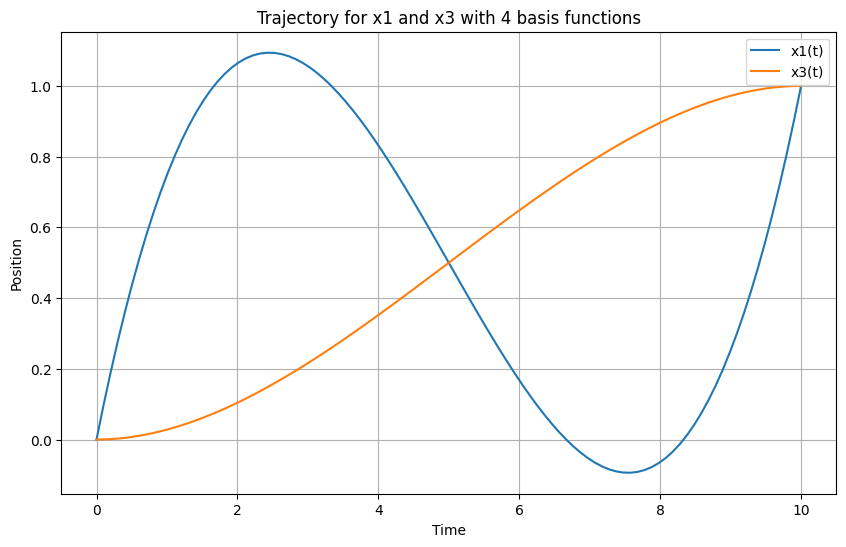

In [33]:
# Plot the trajectories x1 and x3
plt.figure(figsize=(10, 6))
plt.plot(t_vals, x1_vals, label='x1(t)')
plt.plot(t_vals, x3_vals, label='x3(t)')
plt.xlabel('Time')
plt.ylabel('Position')
plt.legend()
plt.title("Trajectory for x1 and x3 with 4 basis functions")
plt.grid()
plt.show()